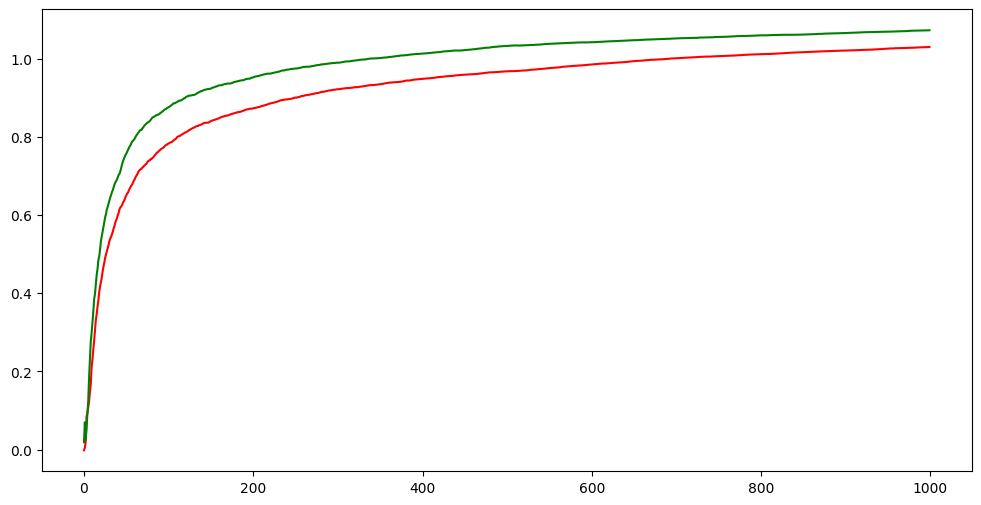

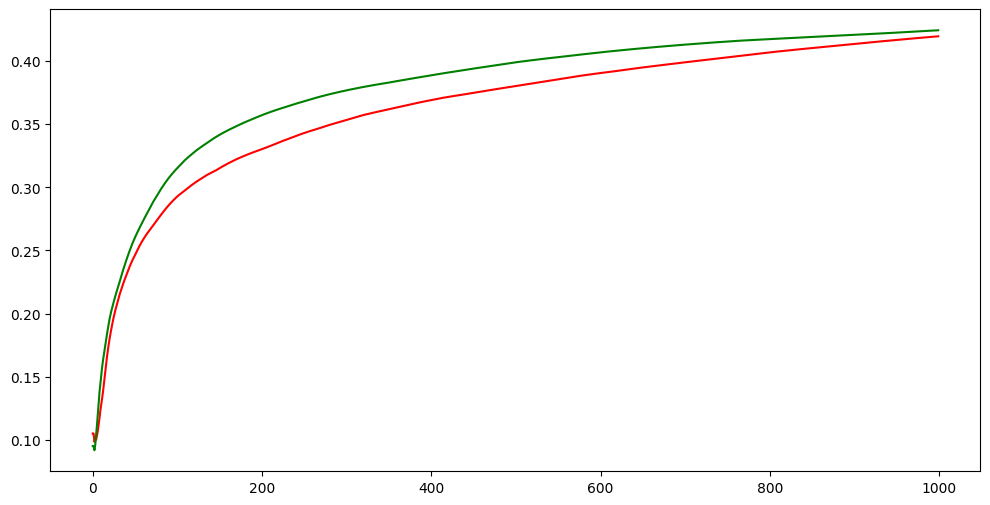

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import profile

from chapter2 import  *

def run_greedy(num_arms, num_steps, num_tasks, epsilon):
    avg_optimal_actions = np.zeros(num_steps)
    avg_avg_rewards = np.zeros(num_steps)
    for t in range(num_tasks):
        means = np.random.randn(num_arms)
        qs = np.zeros(num_arms)
        ns = np.zeros(num_arms, dtype = np.int32)
        avg_rewards = np.zeros(num_steps)
        optimal_actions = np.zeros(num_steps)
        cum_reward = 0.0
        cum_optimal_action = 0
        optimal_action_index = means.argmax()
        offsets = np.random.randn(num_steps)
        for s in range(num_steps):
            idx = epsilon_greedy(qs, epsilon)
            reward = means[idx] + offsets[s]
            qs[idx] += (reward - qs[idx]) / (ns[idx] + 1)
            ns[idx] += 1
            cum_reward += reward
            avg_rewards[s] = cum_reward/(s+1)
            if idx == optimal_action_index:
                cum_optimal_action += 1 
            optimal_actions[s] = float(cum_optimal_action)/float(s+1)
        avg_avg_rewards += (avg_rewards - avg_avg_rewards)/(t+1)
        avg_optimal_actions += (optimal_actions  - avg_optimal_actions)/(t+1)
    return avg_avg_rewards, avg_optimal_actions


def run_grident(num_arms, num_steps, num_tasks, alpha):
    avg_optimal_actions = np.zeros(num_steps)
    avg_avg_rewards = np.zeros(num_steps)
    actions = np.arange(num_arms)
    for t in range(num_tasks):
        means = np.random.randn(num_arms)
        hs = np.zeros(num_arms)
        avg_rewards = np.zeros(num_steps)
        optimal_actions = np.zeros(num_steps)
        cum_reward = 0.0
        cum_optimal_action = 0
        optimal_action_index = means.argmax()
        offsets = np.random.randn(num_steps)            
        for s in range(num_steps):
            ps = softmax(hs)
            #idx = np.random.choice(actions, p=ps)
            idx = np.argmax(ps)
            reward = means[idx] + offsets[s]
            cum_reward += reward
            avg_rewards[s] = cum_reward/(s+1)
            mask = np.zeros(num_arms)
            mask[idx] = 1
            hs += alpha*(reward - avg_rewards[s])*(mask - ps)
            if idx == optimal_action_index:
                cum_optimal_action += 1 
            optimal_actions[s] = float(cum_optimal_action)/float(s+1)
        avg_avg_rewards += (avg_rewards - avg_avg_rewards)/(t+1)
        avg_optimal_actions += (optimal_actions  - avg_optimal_actions)/(t+1)
    return avg_avg_rewards, avg_optimal_actions


def test():
    num_arms = 10
    num_steps = 1000
    num_tasks = 200
    rewards0, actions0 = run_grident(num_arms,num_steps,num_tasks,0.1)
    rewards1, actions1 = run_grident(num_arms,num_steps,num_tasks,0.4)
#'''
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_steps), rewards0,"r")
    plt.plot(range(num_steps), rewards1,"g")
    plt.show()
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_steps), actions0,"r")
    plt.plot(range(num_steps), actions1,"g")
    plt.show()
#'''

test()
#profile.run("test()",sort=1)



In [9]:
import numpy as np
random.choice?

Signature: random.choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      c:\users\administrator\appdata\local\programs\python\python310\lib\random.py
Type:      method